# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [33]:
#Import pandas, matplotlib, numpy, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
#add distance calculations for array of points
def my_kde2(data, kernel='gaussian', bandwidth=None, grid_size=500):

    #User passes in Pandas series or Numpy array
    if isinstance(data, pd.Series):
      data = data.dropna().to_numpy()
    elif isinstance(data, np.ndarray):
      data = data[~np.isnan(data)]
    else:
      raise ValueError("Input must be Pandas Series or Numpy array")


    # Compute N and std
    N = len(data)
    std_dev = np.std(data)

    # Default bandwidth (Silverman's rule)
    silverman_bandwidth = 1.06 * std_dev * N**(-1/5)
    print("Plug-in Bandwidth (Silverman's rule):", round(silverman_bandwidth, 3))

    # Use default bandwidth if none other provided
    if bandwidth is None:
        bandwidths = [silverman_bandwidth]
    elif isinstance(bandwidth, list):
        bandwidths = bandwidth
    else:
        bandwidths = [bandwidth]

    # Grid
    grid = np.linspace(data.min() - 3*std_dev, data.max() + 3*std_dev, grid_size)

    # Define kernel functions
    def gaussian_kernel(z):
        return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

    def uniform_kernel(z):
        return 0.5 * (np.abs(z) <= 1)

    def epanechnikov_kernel(z):
        return 0.75 * (1 - z**2) * (np.abs(z) <= 1)

    # Select kernel
    if kernel == 'gaussian':
        kernel_func = gaussian_kernel
    elif kernel == 'uniform':
        kernel_func = uniform_kernel
    elif kernel == 'epanechnikov':
        kernel_func = epanechnikov_kernel
    else:
        raise ValueError("Invalid kernel. Choose 'gaussian', 'uniform', or 'epanechnikov'.")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.rugplot(data, color='black', height=0.05)

    # KDE for each bandwidth
    for h in bandwidths:
        z = (grid[:, None] - data[None, :]) / h  # shape: [grid_size, N]
        kde_values = kernel_func(z)
        kde = kde_values.mean(axis=1) / h  # normalize
        sns.lineplot(x=grid, y=kde, label=f'h = {round(h, 2)}')

    # Plot labels and title
    plt.title(f"KDE with {kernel.capitalize()} Kernel")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend(title="Bandwidth")
    plt.show()

In [45]:
#Load the pre-trial data
url = url = "https://raw.githubusercontent.com/ds3001f25/visualization/refs/heads/main/data/pretrial_data.csv"
df_pretrial = pd.read_csv(url)
df_pretrial.head()

#look at pretrial data columns
df_pretrial.columns


Index(['Unnamed: 0', 'case_type', 'age', 'sex', 'race', 'is_poor', 'bond',
       'bond_type', 'prior_F', 'prior_M', 'gini', 'released', 'sentence_type',
       'sentence', 'bond_NA', 'held_wo_bail', 'sentence_NA'],
      dtype='object')

Plug-in Bandwidth (Silverman's rule): 1.774


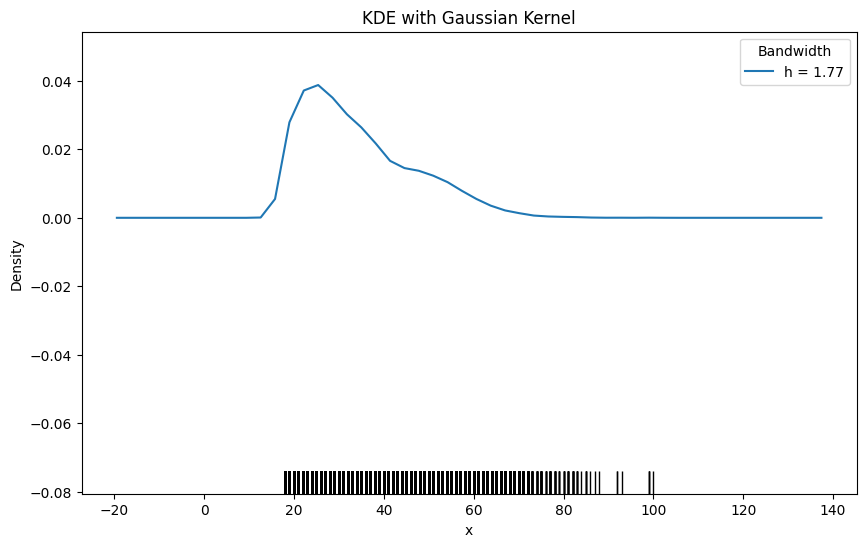

In [46]:
#Use my_kde function on pre-trial data
my_kde2(df_pretrial['age'], kernel='gaussian', bandwidth=None, grid_size=50)

[Text(0.5, 1.0, 'Kernel Density Plot of age'), Text(0.5, 0, 'age')]

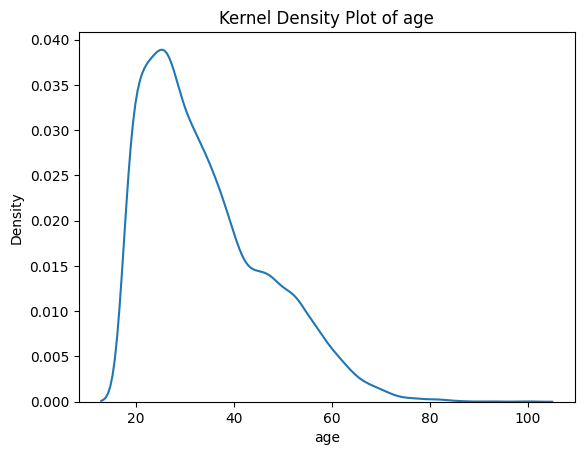

In [47]:
#Compare with seaborn kde plot
seaborn_kde = sns.kdeplot(df_pretrial['age'])
seaborn_kde.set(title = 'Kernel Density Plot of age', xlabel = 'age')


**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [11]:
#Import pandas, matplotlib, numpy, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Load the ./data/college_completion.csv data with Pandas.**

In [12]:
#Load the data
url = url = "https://raw.githubusercontent.com/ds3001f25/visualization_assignment/refs/heads/main/data/college_completion.csv"
df_college = pd.read_csv(url)

**What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.**


In [13]:
#dimensions of the data
df_college.shape

(3798, 63)

In [14]:
#how many observations are there
df_college.shape[0]

3798

In [15]:
#variables included
df_college.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [16]:
#examine data
df_college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**3. Cross-tabulate control and level. Describe the patterns you see.**

In [17]:
pd.crosstab(df_college['control'], df_college['level'], dropna = False)

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Patterns: The students who went to a private not-for-profit school were most likely to complete a 4-year college program followed by public schools, and then private for-profit schools. Students who attended public schools were most likely to complete a 2-year program, followed by private for-profit, and then private not-for-profit.

**4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.**

[Text(0.5, 1.0, 'Histogram of grad_100_value'),
 Text(0.5, 0, 'grad_100_value'),
 Text(0, 0.5, 'Frequency')]

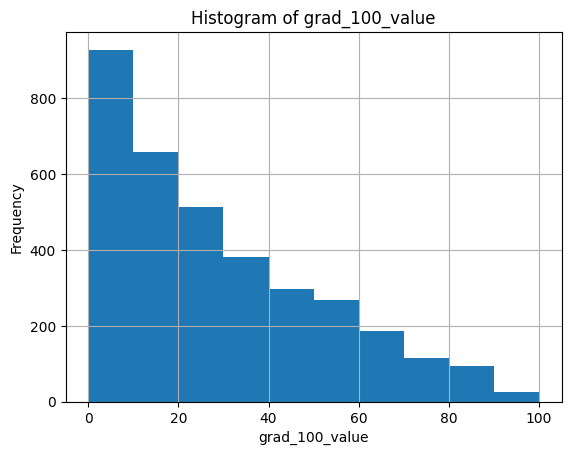

In [18]:
#Histogram for grad_100_value
df_college_hist = df_college['grad_100_value'].hist()
df_college_hist.set(title = 'Histogram of grad_100_value', xlabel = 'grad_100_value', ylabel = 'Frequency')

[Text(0.5, 1.0, 'Kernel Density Plot of grad_100_value'),
 Text(0.5, 0, 'grad_100_value')]

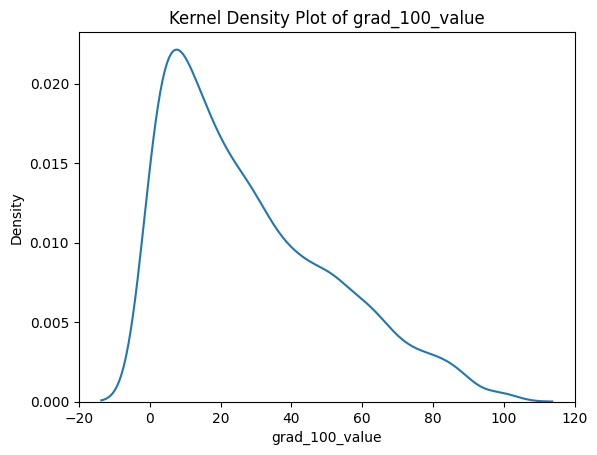

In [19]:
#Kernel density plot for grad_100_value
df_college_kde = sns.kdeplot(df_college['grad_100_value'])
df_college_kde.set(title = 'Kernel Density Plot of grad_100_value', xlabel = 'grad_100_value')

[Text(0.5, 1.0, 'Boxplot of grad_100_value'), Text(0.5, 0, 'grad_100_value')]

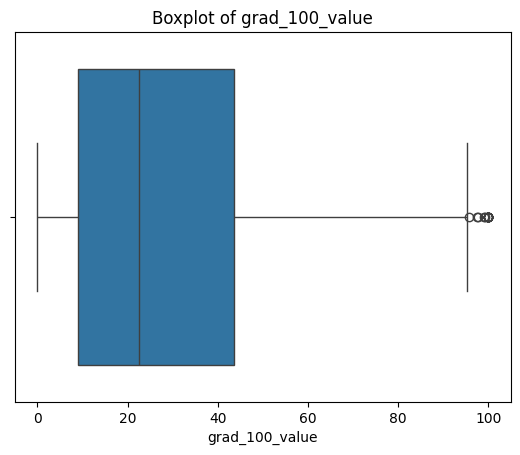

In [20]:
#Boxplot for grad_100_value
df_college_box = sns.boxplot(x = df_college['grad_100_value'])
df_college_box.set(title = 'Boxplot of grad_100_value', xlabel = 'grad_100_value')

In [21]:
#statistical description
df_college['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


**5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?**

[Text(0.5, 1.0, 'Kernel Density Plot of grad_100_value by control'),
 Text(0.5, 0, 'grad_100_value')]

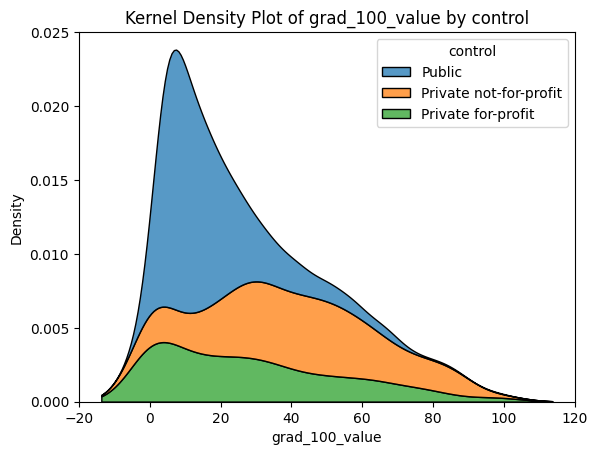

In [22]:
#Kernel density plot by control
control_kde = sns.kdeplot(data = df_college, x = 'grad_100_value', hue = 'control', multiple = 'stack')
control_kde.set(title = 'Kernel Density Plot of grad_100_value by control', xlabel = 'grad_100_value')


In [23]:
#Statistical description of control
df_college.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


[Text(0.5, 1.0, 'Kernel Density Plot of grad_100_value by level'),
 Text(0.5, 0, 'grad_100_value')]

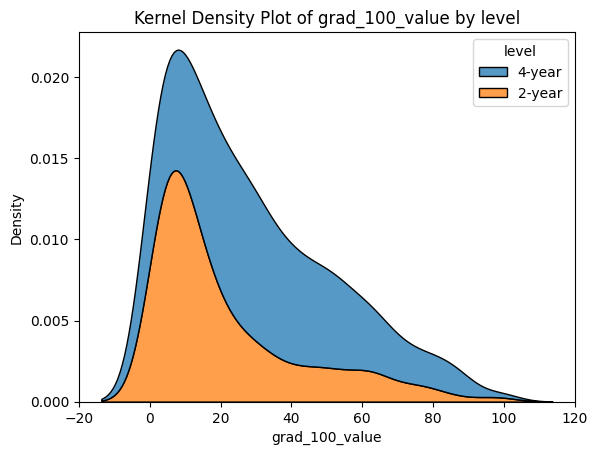

In [24]:
#Kernel density plot by level
level_kde = sns.kdeplot(data = df_college, x = 'grad_100_value', hue = 'level', multiple = 'stack')
level_kde.set(title = 'Kernel Density Plot of grad_100_value by level', xlabel = 'grad_100_value')

In [25]:
#Statistical description of level
df_college.groupby('level')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


The private not-for-profit and 4-year institutions appear to have the best graduation rates

**6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?**

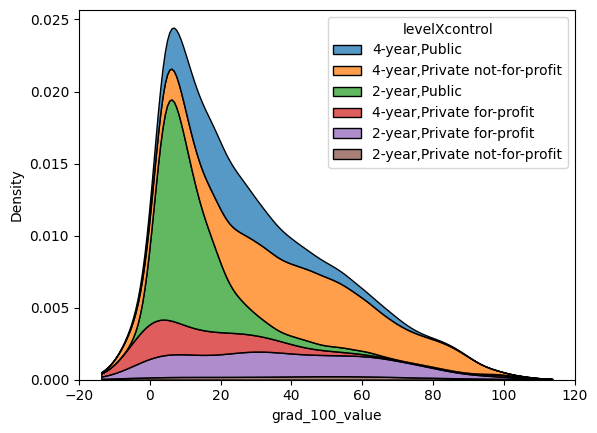

In [26]:
#create a grouped kernel density plot by control and level for grad_100_value
df_college['levelXcontrol'] = df_college['level'] + ',' + df_college['control']
grouped_kde = sns.kdeplot(data = df_college, x = 'grad_100_value', hue = 'levelXcontrol', multiple = 'stack')


In [27]:
#Which insitutions appear to have the best graduation rates?
df_college.groupby(['levelXcontrol'])['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year,Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year,Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year,Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year,Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year,Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year,Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


The 4-year, private not-for-profit appears to have the best graduation rates.

**7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.**

[Text(0.5, 1.0, 'Kernel Density Plot of aid_value'), Text(0.5, 0, 'aid_value')]

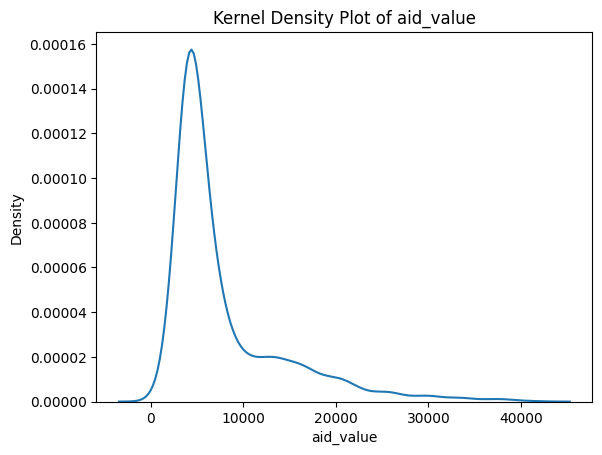

In [28]:
#Make a kernel density plot of aid_value
aid_kde = sns.kdeplot(df_college['aid_value'])
aid_kde.set(title = 'Kernel Density Plot of aid_value', xlabel = 'aid_value')

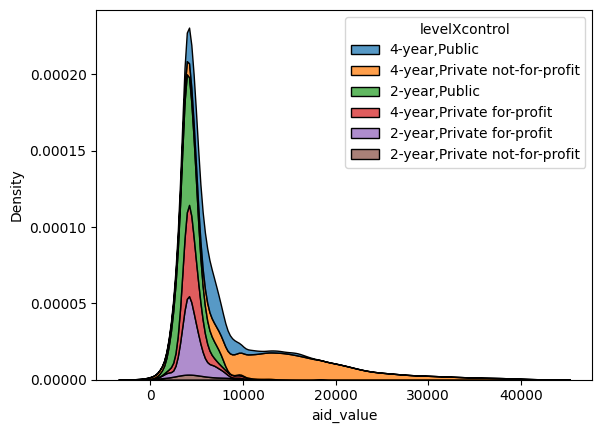

In [29]:
#Group graph by level and control
df_college['levelXcontrol'] = df_college['level'] + ',' + df_college['control']
grouped_kde = sns.kdeplot(data = df_college, x = 'aid_value', hue = 'levelXcontrol', multiple = 'stack')

What explains the shape of the graph? The most aid is within the range of 0-10,000, and therefore there is a peak within this range.

In [30]:
#Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control
df_college.groupby(['levelXcontrol'])['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year,Private for-profit",464.0,4559.681034,1286.688269,294.0,3818.75,4286.5,5122.00,9727.0
"2-year,Private not-for-profit",68.0,5128.058824,2590.449946,934.0,3650.00,4516.5,6311.50,13654.0
"2-year,Public",926.0,4126.199784,1260.271382,881.0,3311.25,3943.5,4762.00,9809.0
"4-year,Private for-profit",527.0,4696.062619,1489.410020,1580.0,3885.50,4364.0,5131.50,18355.0
"4-year,Private not-for-profit",1180.0,14702.401695,7649.775203,902.0,9113.25,13774.5,18996.75,41580.0
"4-year,Public",632.0,6514.071203,2353.716693,2232.0,4990.50,6085.0,7341.50,17299.0


**8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?**

[Text(0.5, 1.0, 'Scatterplot of grad_100_value by aid_value'),
 Text(0.5, 0, 'aid_value'),
 Text(0, 0.5, 'grad_100_value')]

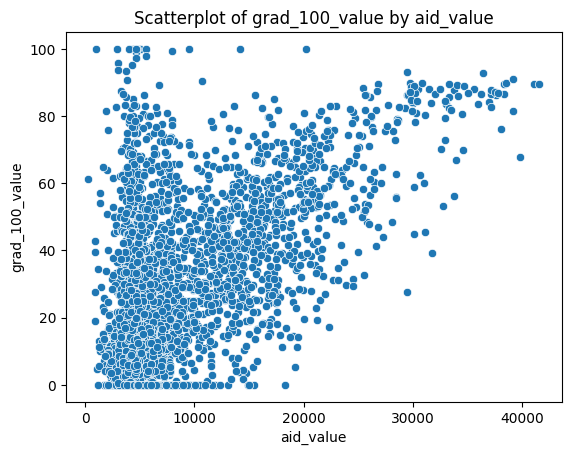

In [31]:
#Scatterplot of grad_100_value by aid_value
grad_aid_scatter = sns.scatterplot(data = df_college, x = 'aid_value', y = 'grad_100_value')
grad_aid_scatter.set(title = 'Scatterplot of grad_100_value by aid_value', xlabel = 'aid_value', ylabel = 'grad_100_value')

Describe what you see: From around 0-10000 for aid value, there is a great deal of fluctuation. However, from after about 10,000 on, as the aid value increases, the grad_100_value also seems to increase.

[Text(0.5, 1.0, 'Scatterplot of grad_100_value by aid_value grouped by level and control'),
 Text(0.5, 0, 'aid_value'),
 Text(0, 0.5, 'grad_100_value')]

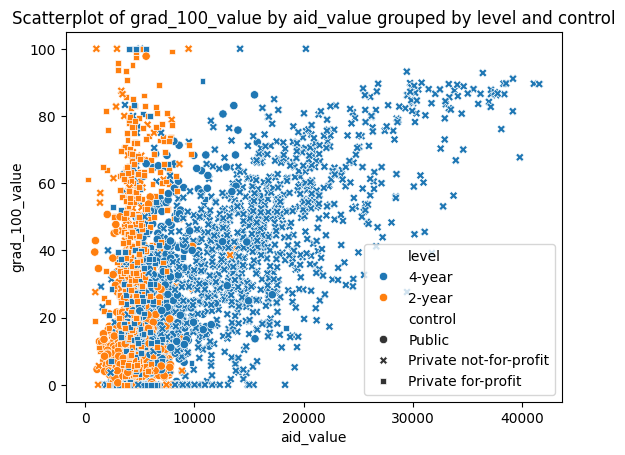

In [32]:
#Scatterplot of grad_100_value by aid_value grouped by level and control
grad_aid_scatter = sns.scatterplot(data = df_college, x = 'aid_value', y = 'grad_100_value', hue = 'level', style = 'control')
grad_aid_scatter.set(title = 'Scatterplot of grad_100_value by aid_value grouped by level and control', xlabel = 'aid_value', ylabel = 'grad_100_value')


Describe what you see: As the aid_value increases, the grad_100 value for 4-year institutions increases. This is especially prevalent for private not-for profit insititutions. However, the aid_value mainly stays under 10,000 for 2-year institutions. This is especially prevalent for private for-profit institutions.

For which kinds of institutions does aid seem to increase graduation rates?
Aid seems to increase graduation rates for 4-year private not-for-profit institutions.